## Курсовая работа по дисциплине Структуры и алгоритмы обработки данных

#### Выполнила студентка группы БФИ2202 Леновская Полина

Общее задание: написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость | 


1. Рассчитать общую выручку магазина. 
2. Найти товар, который был продан наибольшее количество раз. 
3. Найти товар, который принес наибольшую выручку. 
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке. 


Импортировала необходимые библиотеки.

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

Написала функции сортировки пузырьком и сортировки вставками.

In [315]:
def sort_bubble(mas):
    swapped = False
    for i in range(len(mas)-1, 0, -1):
        for j in range(i):
            if mas[j] > mas[j+1]:
                mas[j], mas[j+1] = mas[j+1], mas[j]
                swapped = True
        if swapped:
            swapped = False
        else:
            break

def insertion_sort(mas):
    for i in range(1, len(mas)):
        temp = mas[i]
        j = i - 1
        while (j >= 0 and temp < mas[j]):
            mas[j + 1] = mas[j]
            j = j - 1
        mas[j + 1] = temp

Создала класс хэш-таблиц.

In [316]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.keys = [None] * self.size # ключи
        self.values = [None] * self.size 
    
    def hashFunction(self, key):
        return key % self.size
    
    # Метод для добавления элемента в таблицу
    def put(self, key, data):
        index = self.hashFunction(key)
        if self.keys[index] is None:
            self.keys[index] = key
            self.values[index] = data
        else:
            while self.keys[index] is not None:
                if self.keys[index] == key:
                    self.values[index] = data
                    return
                index = (index + 1) % self.size
            self.keys[index] = key
            self.values[index] = data

    # Метод для получения значения по ключу
    def get(self, key):
        index = self.hashFunction(key)
        if self.keys[index] is None:
            return None
        while self.keys[index] is not None:
            if self.keys[index] == key:
                return self.values[index]
            index = (index + 1) % self.size
        return None

Считала данные из датасета.

In [317]:
df = pd.read_csv("C:\\Users\\Полина\\Desktop\\курсач\\shop.csv", encoding='cp1251')

In [318]:
df.head()

,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
0,7110,22.05.2023,Игрушка антистресс гусеница,Игрушки,66.0,1617.0,106722.0
1,2610,04.09.2023,Рубашка блузка оверсайз шелковая нарядная в школу,Одежда,82.0,3939.0,322998.0
2,7220,04.12.2023,Развивающий сортер для малышей повтори за ежиком,Игрушки,47.0,1680.0,78960.0
3,8765,15.07.2023,Развивающая игрушка жираф на присоске для детей,Игрушки,14.0,4998.0,69972.0
4,1753,23.02.2024,Звезды смотрят вниз,Книги,28.0,2693.0,75404.0


Проверила датасет на наличие пропущенных значений и удалила их.

In [319]:
df["Количество продаж"].isna().sum()

6

In [320]:
df = df.dropna()

In [321]:
df

,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
0,7110,22.05.2023,Игрушка антистресс гусеница,Игрушки,66.0,1617.0,106722.0
1,2610,04.09.2023,Рубашка блузка оверсайз шелковая нарядная в школу,Одежда,82.0,3939.0,322998.0
2,7220,04.12.2023,Развивающий сортер для малышей повтори за ежиком,Игрушки,47.0,1680.0,78960.0
3,8765,15.07.2023,Развивающая игрушка жираф на присоске для детей,Игрушки,14.0,4998.0,69972.0
4,1753,23.02.2024,Звезды смотрят вниз,Книги,28.0,2693.0,75404.0
5,1727,17.05.2024,Силиконовый прорезыватель для зубов,Игрушки,88.0,3151.0,277288.0
6,3779,09.02.2024,джинсы трубы широкие с высокой посадкой,Одежда,87.0,3285.0,285795.0
10,7477,13.08.2023,Дама с букетом гвоздик,Книги,98.0,4163.0,407974.0
11,8559,18.10.2023,Джинсы классические прямые,Одежда,37.0,3467.0,128279.0
12,1506,09.11.2023,Каркас для фотозоны 3х2 м,Канцелярия,40.0,1370.0,54800.0


Объявила переменные для дальнейшей работы.

In [322]:
total_revenue = 0
products = []
count_of_products = []
cost_of_unit = []
total_cost = []
revenue_shares = []

In [323]:
try:
    products = df["Название товара"].to_list()
    count_of_products = df["Количество продаж"].astype(int).to_list()
    cost_of_unit = df["Цена за единицу"].to_list()
    total_cost = df["Общая стоимость"].astype(int).to_list()
    
    #Выручка      
    total_revenue = sum(total_cost)
    print(f'Общая выручка: {total_revenue}.', end = '\n')
    print()    

    #Товар, проданный большее количество раз    
    product_sales = HashTable(len(products) + 1)
    for i in range(len(products)):
        product_sales.put(count_of_products[i], products[i])  

    count_of_products_2 = count_of_products.copy()
    insertion_sort(count_of_products_2)
    max_1 = count_of_products_2[-1]
    print(f'Товар, проданный наибольшее количество раз: {product_sales.get(max_1)}, количество продаж: {max_1}.', end = '\n')
    print()
    
    #Товар с наибольшей выручкой    
    total_cost_2 = total_cost.copy()
    sort_bubble(total_cost_2)    
    max_2 = total_cost_2[-1]
    max_revenue = HashTable(len(products) + 1)
    for i in range(len(products)):
        max_revenue.put(total_cost[i], products[i])  
    print(f'Товар, который принес наибольшую выручку: {max_revenue.get(max_2)}, выручка: {max_2}.')
    print()

    #Составление отчета
    for i in range(len(total_cost)):
        revenue_shares.append(total_cost[i] / total_revenue * 100)
    
    data = {"Наименование товара": products,
            "Количество продаж": count_of_products,
            "Выручка": total_cost,
            "Доля выручки в %": revenue_shares}
    df_1 = pd.DataFrame(data)
    df_1 = df_1.sort_values(by=["Доля выручки в %"])
    display(df_1)

except Exception as e:
    print(f"Возникла ошибка: {e}")

Общая выручка: 4745495.

Товар, проданный наибольшее количество раз: Программист-прагматик 2-е юбилейное изд, количество продаж: 100.

Товар, который принес наибольшую выручку: Футболка базовая однотонная, выручка: 437800.



,Наименование товара,Количество продаж,Выручка,Доля выручки в %
15,музыкальная машина 360 Future 09,11,37961,0.799938
9,Каркас для фотозоны 3х2 м,40,54800,1.154779
3,Развивающая игрушка жираф на присоске для детей,14,69972,1.474493
4,Звезды смотрят вниз,28,75404,1.588960
2,Развивающий сортер для малышей повтори за ежиком,47,78960,1.663894
17,Кондиционер-ополаскиватель для белья Parfumia 2шт,43,88838,1.872049
16,Платье летнее яркое с разрезами,84,95844,2.019684
22,Сапоги женские резиновые с чулком зимние для д...,63,103950,2.190499
0,Игрушка антистресс гусеница,66,106722,2.248912
20,Халат банный с капюшоном,41,110905,2.337059


График, отражающий выручку по каждому из товаров и выделяющий товар, принесший максимальную выручку.

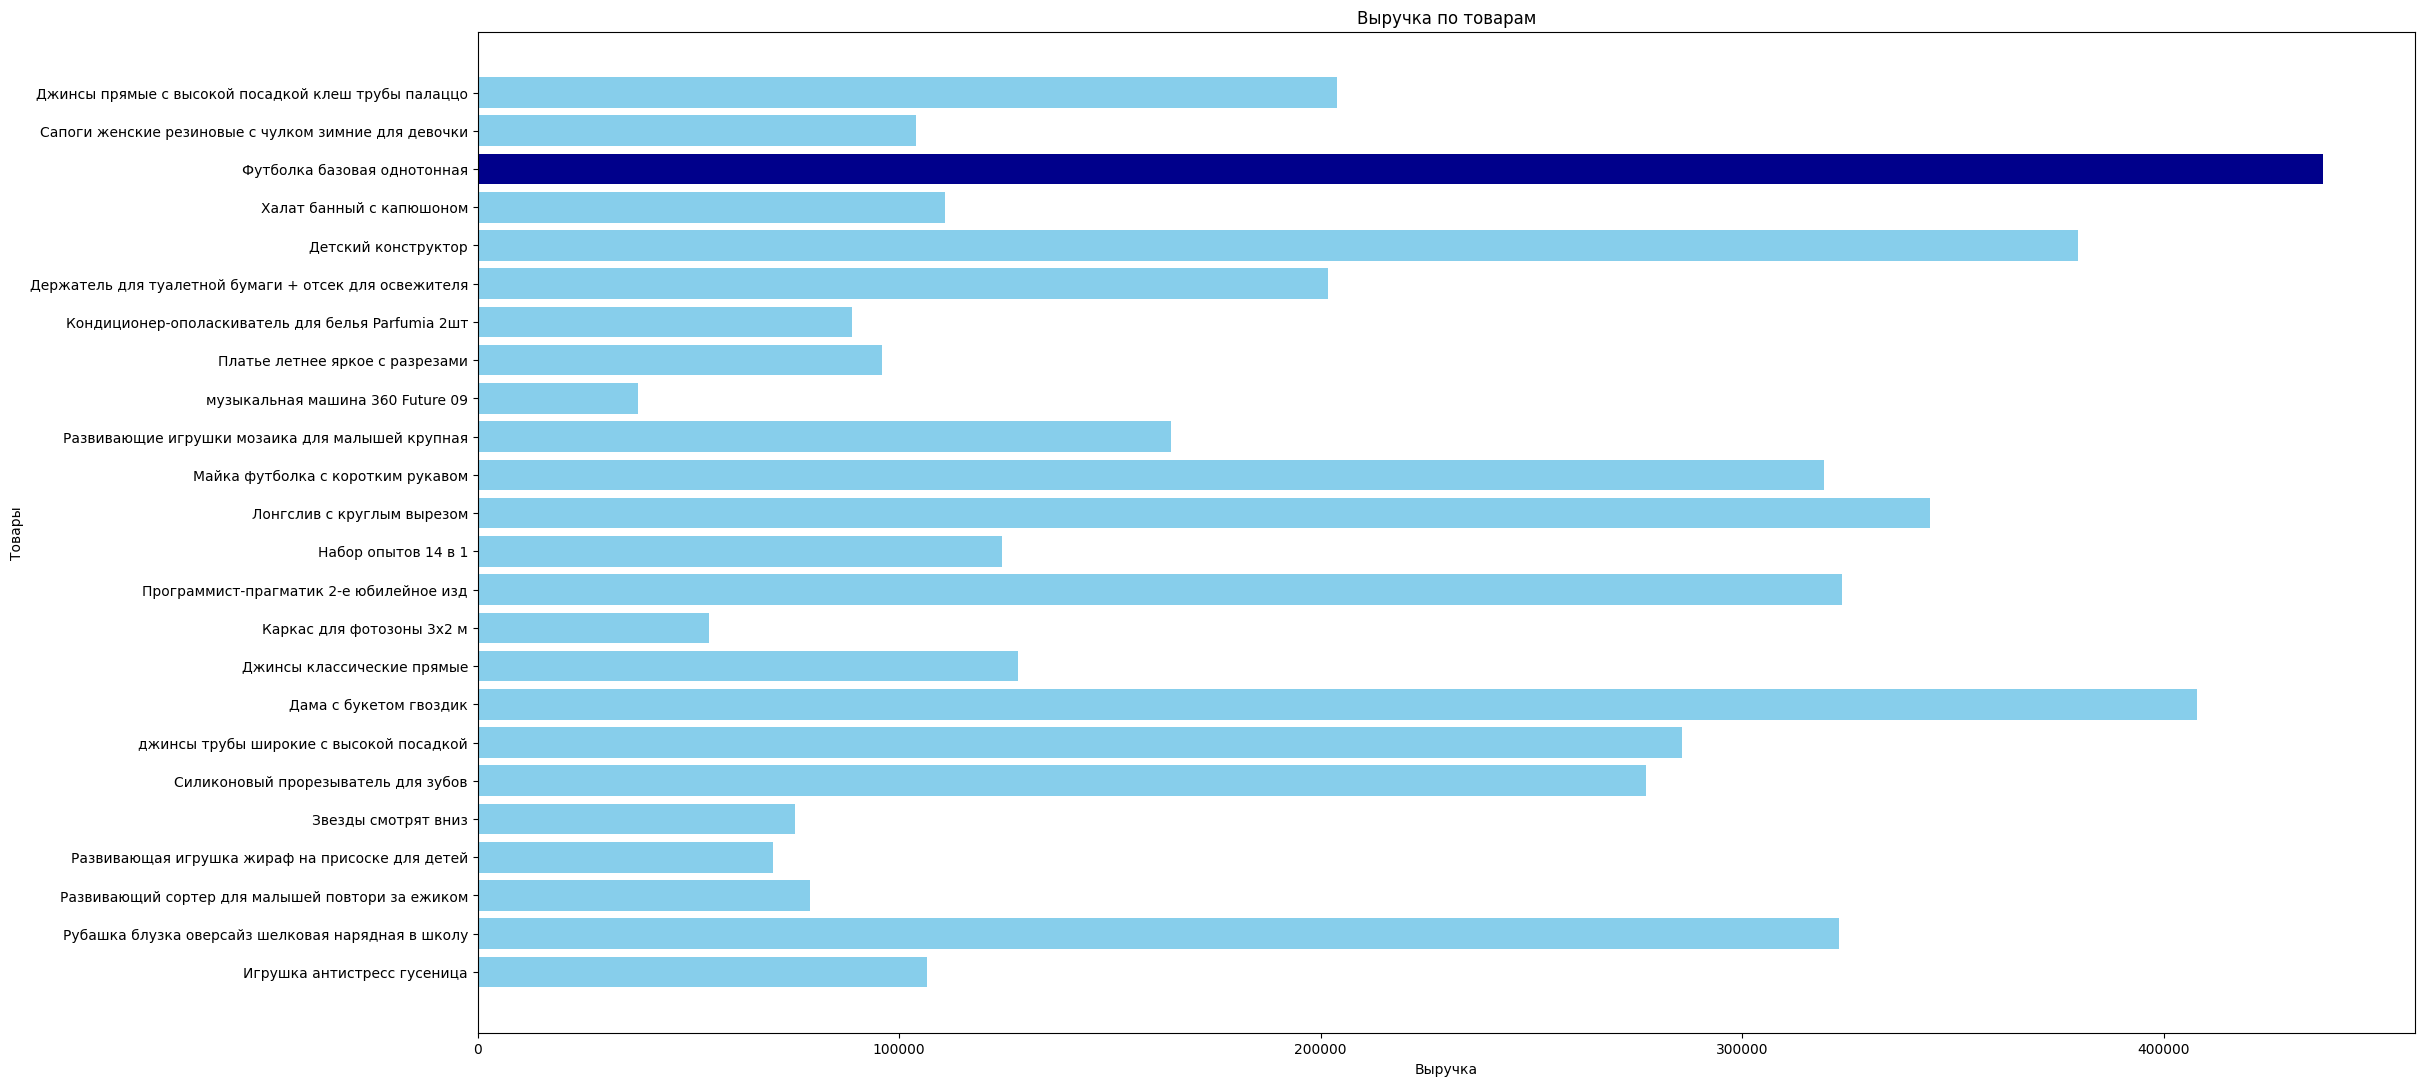

In [324]:
plt.figure(figsize = (25, 13))
plt.barh(products, total_cost, color = 'skyblue')
plt.xlabel('Выручка')
plt.ylabel('Товары')
plt.title('Выручка по товарам')

# Находим индекс товара с наибольшей выручкой
max_revenue_index = total_cost.index(max(total_cost))

# Выделяем товар с наибольшей выручкой цветом
plt.barh(max_revenue_index, total_cost[max_revenue_index], color='darkblue')

plt.show()


График, отражающий количество продаж по каждому из товаров и выделяющий товар, проданный максимальное количество раз.

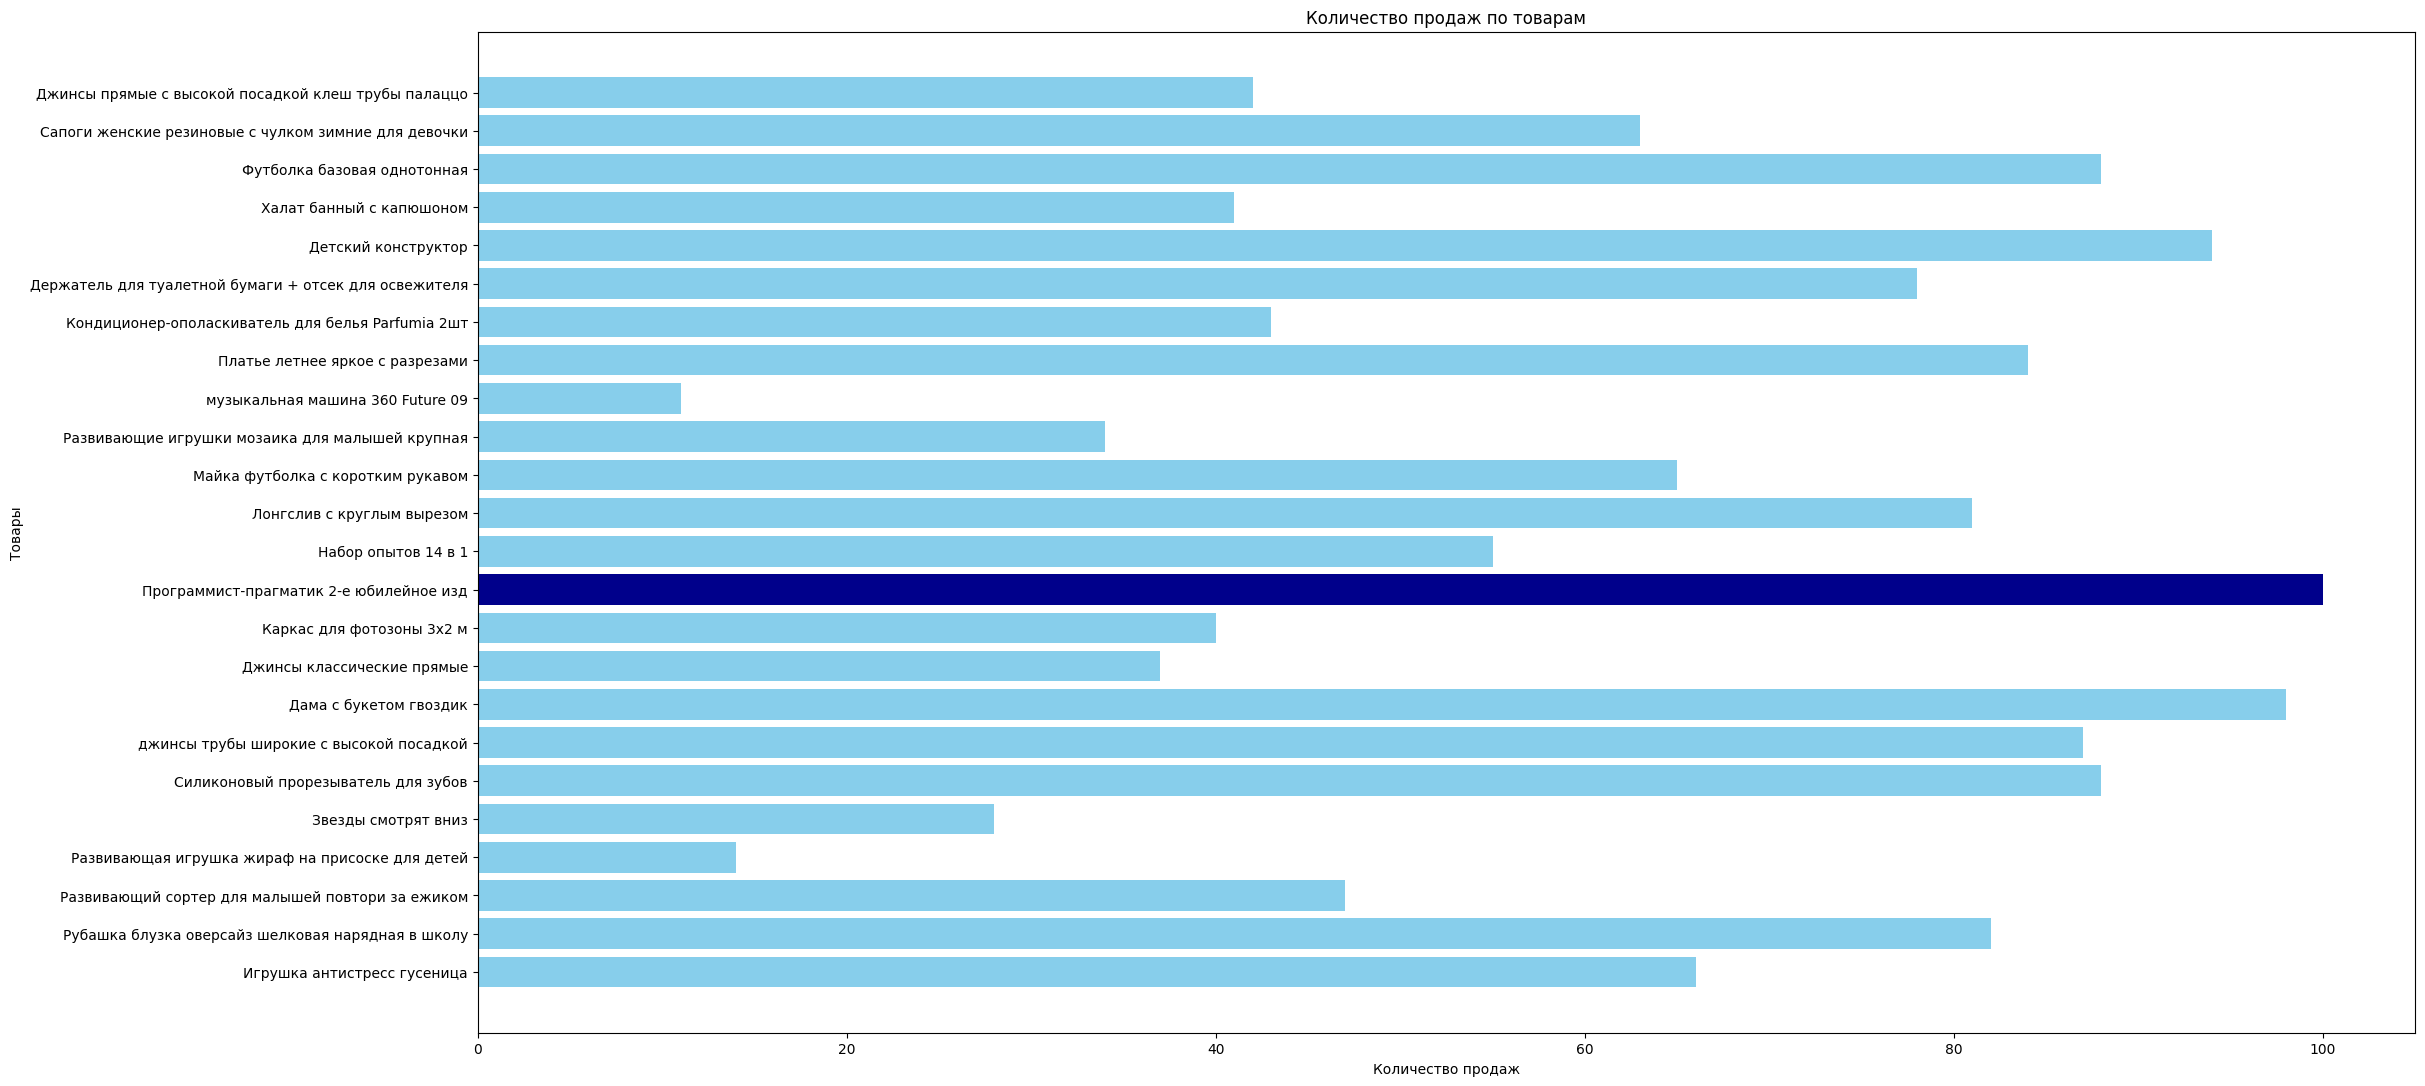

In [325]:
plt.figure(figsize = (25, 13))
plt.barh(products, count_of_products, color = 'skyblue')
plt.ylabel('Товары')
plt.xlabel('Количество продаж')
plt.title('Количество продаж по товарам')

# Находим индекс товара с наибольшей выручкой
max_revenue_indices = [i for i, x in enumerate(count_of_products) if x == max(count_of_products)]

# Выделяем товары с наибольшей выручкой цветом
for index in max_revenue_indices:
    plt.barh(index, count_of_products[index], color='darkblue')

plt.show()

График, отражающий долю выручки по каждому из товаров.

Text(0.5, 1.0, 'Доля выручки по товарам')

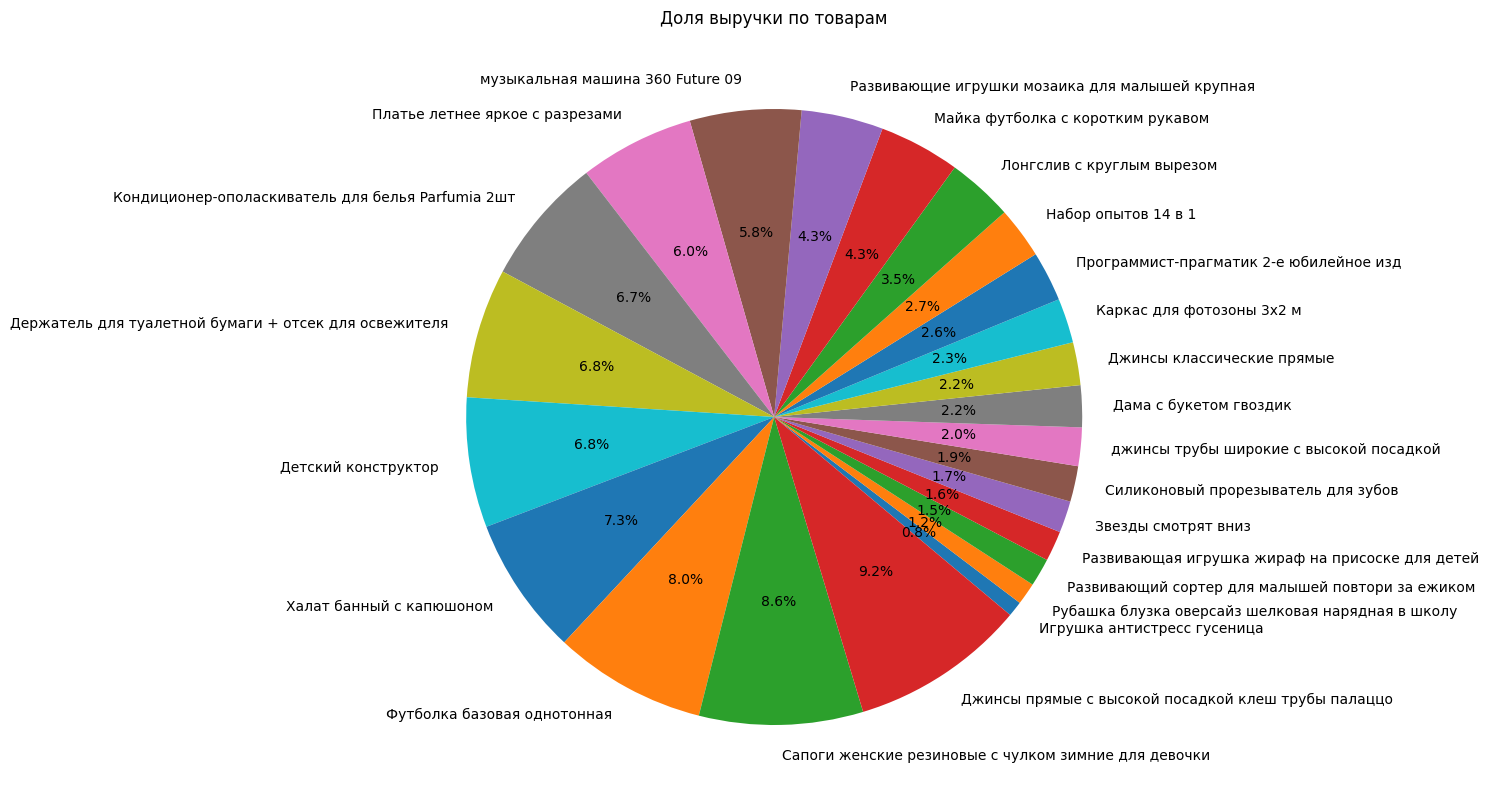

In [326]:
plt.figure(figsize = (20, 10))
plt.pie(df_1["Доля выручки в %"], labels = products, autopct = '%1.1f%%', startangle=-40)
plt.title('Доля выручки по товарам')

## Вывод:

В ходе курсовой работы была разработана программа для анализа датасета с продажами. Посчитана общая выручка, выведен товар, принесший максимальную выручку, и товар, проданный максимальное количество раз. Составлен отчет в виде датафрейма, в котором отображено название товара, количество продаж, выручка и доля выручки от всей выручки. 

Также представлены диаграммы, созданные по этим данным: диаграмма, отображающая продаваемость товаров, на которой выделен самый продаваемый товар, диаграмма, отображающая выручку по каждому из товаров, на которой выделен товар, принесший максимальную выручку, и круговая диаграмма, отражающая долю выручки по каждому из товаров от всей выручки. 